In [3]:
%pwd #print the current working directory

'c:\\Users\\oanuf\\Google Drive\\Programming\\GitHub\\Python_Trading_Snippets'

In [1]:
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pd.options.plotting.backend = "plotly" # Set default charting for pandas to plotly

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)

In [3]:
# Importing Alpaca SDK
from keys_config import *

import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import TimeFrame
from pytz import timezone

alpaca = tradeapi.REST(API_KEY_PAPER, API_SECRET_PAPER, API_BASE_URL_PAPER, 'v2')

### Fear & Greed
Read csv taken from PartTimeLarry

In [5]:
data = pd.read_csv('D:\\Data\\Other_data\\spy-put-call-fear-greed-vix.csv',parse_dates=['Date'])
data.set_index('Date',inplace=True)
data
data.dtypes

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-01-03  126.709999  127.599998  125.699997  127.050003  104.563118   
2011-01-04  127.330002  127.370003  126.190002  126.980003  104.505478   
2011-01-05  126.580002  127.720001  126.459999  127.639999  105.048676   
2011-01-06  127.690002  127.830002  127.010002  127.389999  104.842949   
2011-01-07  127.559998  127.769997  126.150002  127.139999  104.637177   
...                ...         ...         ...         ...         ...   
2020-09-14  337.489990  340.380005  334.220001  338.459991  337.110535   
2020-09-15  341.119995  342.019989  338.470001  340.170013  338.813751   
2020-09-16  341.510010  343.059998  338.519989  338.820007  337.469116   
2020-09-17  333.559998  337.700012  332.989990  335.839996  334.501007   
2020-09-18  335.369995  335.489990  327.970001  330.649994  330.649994   

               Volume  Put Call  Fear Greed        VIX  
Date                                                    
2011-01-03  138725200      0.40          68  17.610001  
2011-01-04  137409700      0.43          68  17.379999  
2011-01-05  133975300      0.48          67  17.020000  
2011-01-06  122519000      0.46          64  17.400000  
2011-01-07  156034600      0.50          63  17.139999  
...               ...       ...         ...        ...  
2020-09-14   65605700      0.49          59  25.850000  
2020-09-15   52920900      0.46          59  25.590000  
2020-09-16   82096000      0.51          56  26.040001  
2020-09-17   91523300      0.58          53  26.459999  
2020-09-18  105790800      0.63          52  25.830000  

[2445 rows x 9 columns]

Open          float64
High          float64
Low           float64
Close         float64
Adj Close     float64
Volume          int64
Put Call      float64
Fear Greed      int64
VIX           float64
dtype: object

In [6]:
fig1 = px.bar(data['Fear Greed'].value_counts(),title="Fear Greed")
fig1.update_layout(showlegend=False,title_x=0.5)
fig2 = px.histogram(data, x="Volume", nbins=20)
fig2.update_layout(showlegend=False,title_x=0.5)

In [9]:
small_data=data.loc["2019"]
fig = make_subplots(specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(x=small_data.index, y= small_data['Adj Close']), secondary_y=False)  
fig.add_trace(go.Scatter(x=small_data.index, y= small_data['Fear Greed']), secondary_y=True)  

In [10]:
symbols = ["SPY", "TSLA", "AAPL"]
timeframe = "1Day"
start = "2022-06-01"
end = "2022-06-30"
# Retrieve daily bars for SPY, TSLA, and AAPL in a DataFrame
bars = alpaca.get_bars(symbols, timeframe, start, end).df
spy_bars = bars.loc[bars["symbol"] == "SPY"]
tsla_bars = bars.loc[bars["symbol"] == "TSLA"]
aapl_bars = bars.loc[bars["symbol"] == "AAPL"]
spy_bars.head(2)

AttributeError: 'str' object has no attribute 'value'

In [6]:
limit = 10000
aapl_trades = alpaca.get_trades(symbols[2], limit=limit).df
aapl_trades.head()
exchange_histogram = px.histogram(aapl_trades, x="exchange")
exchange_histogram.update_layout(
    title="Frequency of exchanges in the first 10,000 trades of $AAPL on January 19, 2022",
    yaxis_title="Number of trades",
    xaxis_title="Exchange")

exchange   price  size conditions   id tape
timestamp                                                                   
2022-06-14 04:06:02.252000+00:00        D  133.86     2  [@, T, I]  557    C
2022-06-14 04:07:55.530000+00:00        D  134.07     4  [@, T, I]  525    C
2022-06-14 04:07:55.530000+00:00        D  134.07     1  [@, T, I]  537    C
2022-06-14 04:08:04.193000+00:00        D  134.07     7  [@, T, I]  524    C
2022-06-14 04:08:04.193000+00:00        D  134.07     1  [@, T, I]  563    C

In [7]:
start = "2022-01-04T14:30:00Z"
end = "2022-01-04T21:00:00Z"
limit = 1000
# Get Shopify quotes in a dataframe and print the first 5 rows
aapl_quotes = alpaca.get_quotes(symbols[2], start, end, limit).df
aapl_quotes.head()
quotes_spread = aapl_quotes["ask_price"] - aapl_quotes["bid_price"]
spread_plot = px.line(aapl_quotes, x=aapl_quotes.index, y=quotes_spread)
spread_plot.update_layout(
    title="Bid-ask spread as a function of time",
    xaxis_title="Time of day",
    yaxis_title="Bid-ask spread ($USD)"
)

ask_exchange  ask_price  ask_size  \
timestamp                                                               
2022-01-04 14:30:00.001455360+00:00            P     182.64         3   
2022-01-04 14:30:00.133363200+00:00            Q     182.64         1   
2022-01-04 14:30:00.134103568+00:00            U     182.65         1   
2022-01-04 14:30:00.134130625+00:00            U     182.65         1   
2022-01-04 14:30:00.134132147+00:00            U     182.65         1   

                                    bid_exchange  bid_price  bid_size  \
timestamp                                                               
2022-01-04 14:30:00.001455360+00:00            P     182.58         1   
2022-01-04 14:30:00.133363200+00:00            P     182.58         1   
2022-01-04 14:30:00.134103568+00:00            P     182.58         1   
2022-01-04 14:30:00.134130625+00:00            Q     182.60         1   
2022-01-04 14:30:00.134132147+00:00            Q     182.60         2   

                                    conditions tape  
timestamp                                            
2022-01-04 14:30:00.001455360+00:00        [R]    C  
2022-01-04 14:30:00.133363200+00:00        [R]    C  
2022-01-04 14:30:00.134103568+00:00        [R]    C  
2022-01-04 14:30:00.134130625+00:00        [R]    C  
2022-01-04 14:30:00.134132147+00:00        [R]    C

In [11]:
all_hist_capital = pd.read_csv('D:\\Data\\Other_data\\hist_capitalisation_index_constit.csv',parse_dates=['date'])
all_hist_capital
print('The earliest date in data is {}'.format(all_hist_capital['date'].min().strftime("%Y-%m-%d")))
print('Max number of appearience of a single symbol is {}'.format(all_hist_capital['symbol'].value_counts().max()))
fig1 = px.bar(all_hist_capital['symbol'].value_counts(),title="Number of occurence of different tickers from 2012")
fig2 = px.bar(all_hist_capital['date'].value_counts(),title="Number of tickers on every date").update_traces(marker_color='green')
fig1.update_layout(showlegend=False,title_x=0.5)
fig2.update_layout(yaxis_range=[450,600],showlegend=False,title_x=0.5)

symbol       date     marketCap   rank
0         AAPL 2021-12-27  2.958566e+12    1.0
1         AAPL 2021-12-23  2.892120e+12    1.0
2         AAPL 2021-12-22  2.881620e+12    1.0
3         AAPL 2021-12-20  2.784986e+12    1.0
4         AAPL 2021-12-17  2.807791e+12    1.0
...        ...        ...           ...    ...
1395984    MBI 2012-01-09  2.356327e+09  471.0
1395985    MBI 2012-01-06  2.389188e+09  470.0
1395986    MBI 2012-01-05  2.362126e+09  469.0
1395987    MBI 2012-01-04  2.342796e+09  469.0
1395988    MBI 2012-01-03  2.422049e+09  467.0

[1395989 rows x 4 columns]

The earliest date in data is 2012-01-03
Max number of appearience of a single symbol is 2513


In [12]:
fig = px.line(all_hist_capital.query("symbol in ['AAPL', 'NVDA','GOOG','DIS']"), x="date", y="marketCap", 
                                    color="symbol", title="Capitalization dynamic")
fig.update_layout(legend=dict(yanchor="middle",y=0.8,xanchor="left",x=0.01),title_x=0.5) # location of legend

# Hedged vs BuyWrite vs Normal

In [4]:
symbols = ['SPY', 
           'PBP', # BuyWrite
           'BUFD' # Hedged
           ]
raw_bars = alpaca.get_bars(symbols, TimeFrame.Hour, "2015-12-01", "2022-07-20", adjustment='all').df
raw_bars.index = raw_bars.index.tz_convert('America/New_York').tz_localize(None) # Convert to market time for easier reading
raw_bars


open    high       low    close    volume  \
timestamp                                                            
2021-01-21 15:00:00   20.1300   20.13   20.1300   20.130       100   
2021-01-22 10:00:00   20.0999   20.10   20.0999   20.100       200   
2021-01-22 12:00:00   20.0898   20.09   20.0898   20.090       320   
2021-01-22 15:00:00   20.0977   20.10   20.0977   20.100       498   
2021-01-25 15:00:00   20.0700   20.07   20.0250   20.025      1689   
...                       ...     ...       ...      ...       ...   
2022-07-20 15:00:00  394.5200  395.83  394.3572  394.790  13862880   
2022-07-20 16:00:00  394.8000  395.32  393.9400  394.040   7419447   
2022-07-20 17:00:00  393.9000  394.77  393.9000  394.140    147015   
2022-07-20 18:00:00  394.0300  394.77  393.5300  393.670     73761   
2022-07-20 19:00:00  393.6700  394.51  393.1300  394.210     91997   

                     trade_count        vwap symbol  
timestamp                                            
2021-01-21 15:00:00            1   20.130000   BUFD  
2021-01-22 10:00:00            2   20.099950   BUFD  
2021-01-22 12:00:00            2   20.089922   BUFD  
2021-01-22 15:00:00            4   20.098850   BUFD  
2021-01-25 15:00:00            3   20.033786   BUFD  
...                          ...         ...    ...  
2022-07-20 15:00:00        96051  394.789651    SPY  
2022-07-20 16:00:00         6657  394.645026    SPY  
2022-07-20 17:00:00          928  394.255936    SPY  
2022-07-20 18:00:00         1029  393.791628    SPY  
2022-07-20 19:00:00          611  394.172728    SPY  

[41641 rows x 8 columns]

In [16]:
raw_bars.loc['2019']

open    high     low   close    volume  trade_count  \
timestamp                                                                    
2019-01-02 09:00:00   17.21   17.40   17.21   17.26      4876           28   
2019-01-02 10:00:00   17.26   17.33   17.14   17.27     42897          216   
2019-01-02 11:00:00   17.39   17.39   17.27   17.32     73177          114   
2019-01-02 12:00:00   17.29   17.36   17.27   17.30     46916           44   
2019-01-02 13:00:00   17.30   17.40   17.30   17.40     22384           79   
...                     ...     ...     ...     ...       ...          ...   
2019-12-31 15:00:00  308.49  309.63  308.44  309.40  15842453        71782   
2019-12-31 16:00:00  309.40  309.92  308.62  309.88  18320796         5796   
2019-12-31 17:00:00  309.80  309.89  309.72  309.73    147900          337   
2019-12-31 18:00:00  309.73  309.84  309.72  309.81     24210          102   
2019-12-31 19:00:00  309.85  309.92  309.82  309.84     21682          186   

                           vwap symbol  
timestamp                               
2019-01-02 09:00:00   17.301097    PBP  
2019-01-02 10:00:00   17.223180    PBP  
2019-01-02 11:00:00   17.297214    PBP  
2019-01-02 12:00:00   17.277407    PBP  
2019-01-02 13:00:00   17.361198    PBP  
...                         ...    ...  
2019-12-31 15:00:00  309.058651    SPY  
2019-12-31 16:00:00  309.436338    SPY  
2019-12-31 17:00:00  309.824665    SPY  
2019-12-31 18:00:00  309.747662    SPY  
2019-12-31 19:00:00  309.891321    SPY  

[5951 rows x 8 columns]

In [14]:
small_data=raw_bars.loc['2019']

fig = make_subplots(specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(x=small_data['Date'], y= small_data['Adj Close']), secondary_y=False)  
fig.add_trace(go.Scatter(x=small_data['Date'], y= small_data['Fear Greed']), secondary_y=True)  
fig = px.line(raw_bars, x=raw_bars.index, y="close", log_y = True, color='symbol',title="Price")
fig.show()

# Earnings Calls Trading Check

Earning calls are not legally mandated, so a company doesn’t actually have to have one. Public companies are required to release the details of their financial performance, but their earnings don’t have to be amongst the details released. 

Some publicly traded companies don’t even have earnings calls.

Earning calls tend to take place on a quarterly basis. Oftentimes, a company will announce the date and time of its call several weeks out.

How long are Earnings Calls: Expect the call to last between 45 and 60 minutes.

In [13]:
dateparse = lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
hist_earn_calls=pd.read_excel('D:\\Data\\Other_data\\all_5Y_earn_calls.xlsx',
                                usecols=['RIC','Ticker', 'ISIN', 'Event_Type', 'Event_date_GMT'],
                                parse_dates=['Event_date_GMT'], date_parser=dateparse)

end = hist_earn_calls['Event_date_GMT'].dt.date.max().strftime("%Y-%m-%d") # latest date in the db
start = hist_earn_calls['Event_date_GMT'].dt.date.min().strftime("%Y-%m-%d") # latest date in the db
symbols = list(set(hist_earn_calls['Ticker']))
print('Earnings calls database is from {} till {} with {} tickers'.format(start,end,len(symbols)))

fig1 = px.bar(hist_earn_calls[hist_earn_calls['Event_Type']=='EarningsReleases']['RIC'].groupby([hist_earn_calls['Event_date_GMT'].dt.hour]).count(),
                title="Number of earning releases by hour")
fig1.update_layout(showlegend=False,title_x=0.5).update_xaxes(title_text='Hour of the day (GMT)',nticks=24).update_yaxes(title_text='Num of Earning Releases')

fig2 = px.bar(hist_earn_calls[hist_earn_calls['Event_Type']=='EarningsReleases']['RIC'].groupby([hist_earn_calls['Event_date_GMT'].dt.date]).count(),
            title="Number of earning releases by date").update_traces(marker_color='red')
fig2.update_layout(showlegend=False,title_x=0.5)

fig3 = px.bar(hist_earn_calls[hist_earn_calls['Event_Type']=='EarningsReleases']['RIC'].groupby([hist_earn_calls['Event_date_GMT'].dt.month]).count(),
            title="Number of earning releases by month").update_traces(marker_color='green')
fig3.update_layout(showlegend=False,title_x=0.5).update_xaxes(title_text='Month',nticks=12).update_yaxes(title_text='Num of Earning Releases')


Earnings calls database is from 2017-02-06 till 2022-02-04 with 643 tickers


# COIN vs BTC

(array([ 4., 12.,  9., 11., 14., 23., 29.,  9., 12., 30., 20.,  1.,  3.,
         8., 27., 37., 53., 23., 15.,  3.]),
 array([-0.1575319 , -0.14586827, -0.13420464, -0.12254102, -0.11087739,
        -0.09921376, -0.08755013, -0.0758865 , -0.06422287, -0.05255924,
        -0.04089561, -0.02923198, -0.01756835, -0.00590473,  0.0057589 ,
         0.01742253,  0.02908616,  0.04074979,  0.05241342,  0.06407705,
         0.07574068]),
 <BarContainer object of 20 artists>)

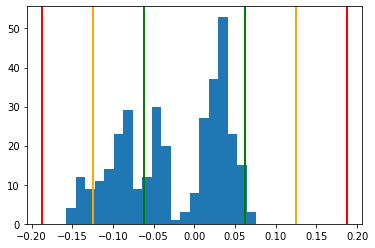

In [6]:
start_date = dt.date.today() - dt.timedelta(days=int(30))
end_date = dt.date.today()

btc = alpaca.get_crypto_bars("BTCUSD", TimeFrame.Hour, start_date, end_date).df
btc = btc[btc['exchange'] == 'CBSE'] # Keep data from only CBSE exchange
coin = alpaca.get_bars("COIN", TimeFrame.Hour, start_date, end_date).df
btc['BTC_minutely_return'] = btc['close'].pct_change().dropna()
coin['COIN_minutely_return'] = coin['close'].pct_change().dropna()
btc['BTC_return'] = btc['BTC_minutely_return'].add(1).cumprod().sub(1) # cumulative return: (1 + return_1) * (1 + return_2) * …
coin['COIN_return'] = coin['COIN_minutely_return'].add(1).cumprod().sub(1)

data = pd.DataFrame()
data["BTC_return"] = btc['BTC_return']
data["COIN_return"] = coin["COIN_return"]
data["spread"] = data["BTC_return"] - data["COIN_return"]
data["spread_std"] = data["spread"].std()
data["spread_upper_std"] = 1 * data["spread_std"]
data["spread_lower_std"] = -1 * data["spread_std"]

data.dropna(inplace=True)


In [7]:

fig1 = px.line(btc, y='BTC_return', color_discrete_sequence=['red'])
fig2 = px.line(coin, y='COIN_return', color_discrete_sequence=['blue'])
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()


In [9]:
fig1 = px.line(data, y='spread',  color_discrete_sequence=['green'], render_mode='svg')
fig1.update_xaxes(
    rangebreaks=[ # hide weekends
        { 'pattern': 'day of week', 'bounds': [6, 1]},
        { 'pattern': 'hour', 'bounds':[23,11]}
    ])

In [11]:

fig2 = px.line(data * 1, y=['spread_upper_std', 'spread_lower_std'], color_discrete_sequence=['cyan'], render_mode='svg')
fig3 = px.line(data * 2, y=['spread_upper_std', 'spread_lower_std'], color_discrete_sequence=['gray'], render_mode='svg')
fig4 = px.line(data * 3, y=['spread_upper_std', 'spread_lower_std'], color_discrete_sequence=['red'], render_mode='svg')

fig5 = go.Figure(data=fig1.data + fig2.data + fig3.data + fig4.data)
fig5.update_xaxes(
    rangebreaks=[
        { 'pattern': 'day of week', 'bounds': [6, 1]},
        { 'pattern': 'hour', 'bounds':[23,11]}
    ])

# Other

In [ ]:
'''
 	Date 	    Name 	Close 	Open 	Return
0 	2016-01-04 	IBM 	135.95 	135.60 	0.002581
1 	2016-01-05 	IBM 	135.85 	136.76 	-0.006654
2 	2016-01-06 	IBM 	135.17 	134.38 	0.005879
3 	2016-01-07 	IBM 	132.86 	133.70 	-0.006283
4 	2016-01-08 	IBM 	131.63 	133.18 	-0.011638
'''

fig = px.strip(
    df, 
    x="Name", 
    y="Return", 
    category_orders={"Name": sorted(df.Name.unique())},
    color="Name"
)
fig.update_layout(yaxis_tickformat=".0%")
plot(fig) # Replace this line by fig.show() to use in a notebook